In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv('./data/drinks.csv')
print(drinks.info())
drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [12]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [15]:
drinks[['beer_servings','wine_servings']].corr(method='pearson')

NameError: name 'corr' is not defined

In [37]:
cols =['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']

corr =drinks[cols].corr(method='pearson')


In [20]:
!pip install seaborn 

In [51]:
cols =['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']

corr =drinks[cols].corr(method='pearson')
print(corr.values)

[[1.         0.45881887 0.52717169 0.83583863]
 [0.45881887 1.         0.19479705 0.65496818]
 [0.52717169 0.19479705 1.         0.66759834]
 [0.83583863 0.65496818 0.66759834 1.        ]]


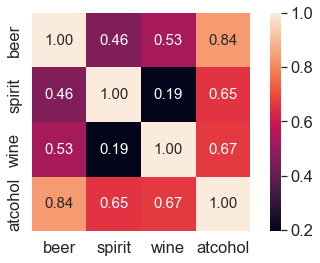

In [50]:
import seaborn as sns

cols_view = ['beer','spirit','wine','atcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
             cbar =True,
             annot=True,
             square=True,
             fmt='.2f',
             annot_kws={'size': 15},
             yticklabels=cols_view,
             xticklabels=cols_view)
plt.tight_layout()
plt.show()

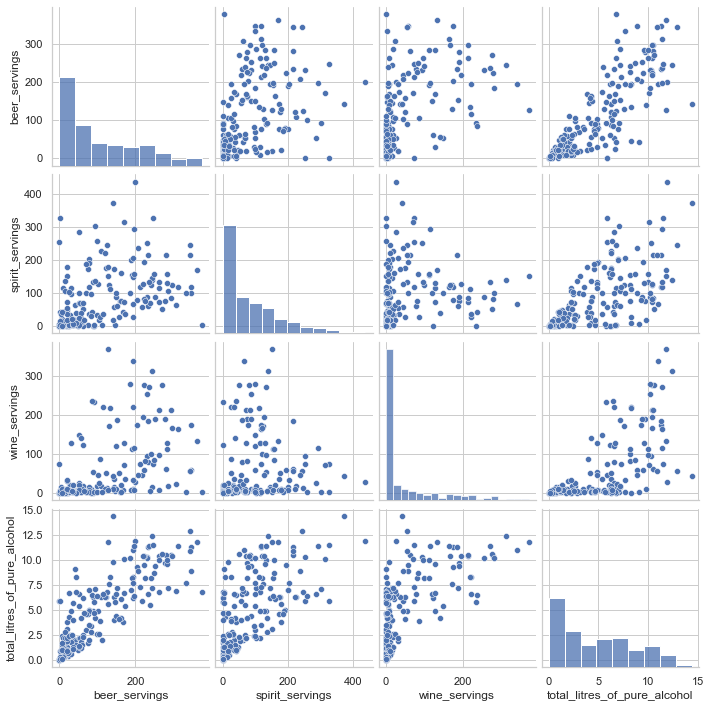

In [55]:
sns.set(style='whitegrid',context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings',
                     'wine_servings','total_litres_of_pure_alcohol']],height=2.5)
plt.show()

In [57]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks['continent'][:10]

0    AS
1    EU
2    AF
3    EU
4    AF
5    OT
6    SA
7    EU
8    OC
9    EU
Name: continent, dtype: object

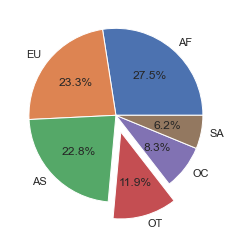

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [64]:
label = drinks['continent'].value_counts().index.tolist()
fracs = drinks['continent'].value_counts().values.tolist()

explode=(0, 0, 0, 0.2, 0, 0)

plt.pie(fracs,labels=label,explode=explode,autopct='%.1f%%',shadow=False)
plt.show()

label

In [67]:
result=drinks.groupby('continent')['spirit_servings'].agg(['mean','max','min','sum'])
result

,mean,max,min,sum
continent,,,,
AF,16.339623,152,0,866
AS,60.840909,326,0,2677
EU,132.555556,373,0,5965
OC,58.437500,254,0,935
OT,165.739130,438,68,3812
SA,114.750000,302,25,1377


In [69]:
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_total_mean = continent_mean[continent_mean>=total_mean]
print(continent_over_total_mean )
print(total_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
4.717098445595855


In [70]:
beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmin()
print(beer_continent)

AS


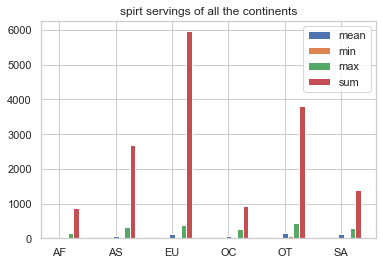

In [75]:
n_continent = len(result.index)
continent = result.index.tolist()
means = result['mean'].tolist()
mins=result['min'].tolist()
maxs=result['max'].tolist()
sums=result['sum'].tolist()

index = np.arange(n_continent)
bar_width=0.1

plt.bar(index,means,bar_width,label='mean')
plt.bar(index+bar_width,mins,bar_width,label='min')
plt.bar(index+bar_width*2,maxs,bar_width,label='max')
plt.bar(index+bar_width*3,sums,bar_width,label='sum')
plt.legend()
plt.xticks(index,continent)
plt.title('spirt servings of all the continents')
plt.show()

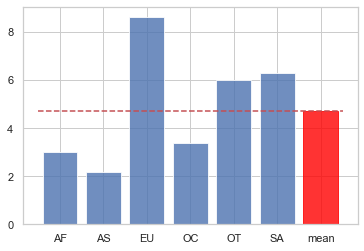

In [83]:
continents = continent_mean.index.tolist()
continents.append('mean')
index = np.arange(len(continets))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bars = plt.bar(index,alcohol,alpha=0.8)
bars[len(continents)-1].set_color('red')
plt.plot([0-0.5,6.5],[total_mean,total_mean],'r--')
plt.xticks(index,continents)
plt.show()